# _Notebook Jupyter_ 2_geraWordclouds

# Geração das WordClouds das descrições

Os dados gerados após o tratamento, objeto de estudo, estão contidos em um campo de descrição, onde o importador ou seu representante faz a entrada livre de dados, sem qualquer exigência ou padronização, nossa análise exploratória foi convincente no sentido de que deveria ser feito um tratamento com a utilização de Programação de Linguagem Natural – PLN.
Dentro dessa análise exploratória de dados, observou-se a ocorrência de palavras que, embora frequentes, serão irrelevantes para a determinação da diferenciação entre os itens que estão classificados dentro do agrupamento representado pela NCM em estudo.
Comum no estudo de categorização de textos, o uso de stopwords é recomendado nesse caso, pois da mesma forma que artigos, pronomes e outras palavras tradicionalmente identificadas como não relevantes para a distinção, termos como kit, transmissão, corrente, coroa e pinhão também são igualmente irrelevantes para distinguir um item de outro.
Na biblioteca Natural Language Processing Toolkit - nltk já existe uma lista de stopwords para a língua portuguesa. Como essa biblioteca já possui a funcionalidade de complementação dessa lista, adicionou-se os itens kit, transmissão, corrente, coroa e pinhão; termos que pela sua característica não distinguem os itens dentro do dataset estudado.

### Importa os dados já tratados

In [1]:
import pandas as pd
import time

In [2]:
# Data e hora da execução do script
print(f'Código executado em {time.strftime("%d/%m/%Y às %H:%M", time.localtime(time.time()))}')

Código executado em 12/01/2022 às 18:26


In [3]:
# Importa base de dados para um dataframe
df = pd.read_excel(r'./bases/dataframe.xlsx')

In [4]:
# Verifica o tamnanho do dataframe
df.shape

(19317, 25)

In [5]:
# Mostra linhas de exemplo do dataframe
df.sample(5)

,NUMERO DE ORDEM,ANOMES,COD.NCM,DESCRICAO DO CODIGO NCM,PAIS.OR,PAIS DE ORIGEM,PAIS.AQ,PAIS DE AQUISICAO,UND.ESTAT.,UNIDADE DE MEDIDA,...,VL FRETE DOLAR,VL SEGURO DOLAR,VALOR UN.PROD.DOLAR,QTD COMERCIAL.,TOT.UN.PROD.DOLAR,UNIDADE DESEMBARQUE,UNIDADE DESEMBARACO,INCOTERM,NAT.INFORMACAO,SITUACAO DO DESPACHO
12843,1848270000100016,202101,87141000,PARTES ACESSÓRIOS P/MOTOCICLET,160,"CHINA, REPUBLICA POP",160,"CHINA, REPUBLICA POP",10,QUILOGRAMA LIQUIDO,...,4150.00,0.00,3.650,400.0,1460.00,N/INFORMADO,ITAJAI,FOB,EFETIVA,DI DESEMBARAÇADA
10805,901410000100022,202012,87141000,PARTES ACESSÓRIOS P/MOTOCICLET,160,"CHINA, REPUBLICA POP",160,"CHINA, REPUBLICA POP",10,QUILOGRAMA LIQUIDO,...,10743.00,775.00,3.701,200.0,740.20,N/INFORMADO,ITAJAI,FOB,EFETIVA,DI DESEMBARAÇADA
8201,269730000100004,202010,87141000,PARTES ACESSÓRIOS P/MOTOCICLET,160,"CHINA, REPUBLICA POP",351,HONG KONG,10,QUILOGRAMA LIQUIDO,...,1699.00,0.00,4.172,500.0,2086.00,N/INFORMADO,IRF - PORTO DE SUAPE,FOB,EFETIVA,DI DESEMBARAÇADA
12970,305940000100003,202102,87141000,PARTES ACESSÓRIOS P/MOTOCICLET,160,"CHINA, REPUBLICA POP",160,"CHINA, REPUBLICA POP",10,QUILOGRAMA LIQUIDO,...,4350.00,0.00,3.890,1000.0,3890.00,N/INFORMADO,ITAJAI,FOB,EFETIVA,DI DESEMBARAÇADA
6102,1044190000700027,202008,87141000,PARTES ACESSÓRIOS P/MOTOCICLET,160,"CHINA, REPUBLICA POP",767,SUICA,10,QUILOGRAMA LIQUIDO,...,789.79,73.89,10.340,48.0,496.32,N/INFORMADO,ITAJAI,FOB,EFETIVA,DI DESEMBARAÇADA


### Importa as stopwords da língua portuguesa

In [6]:
# Importar lista de Stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('portuguese'))

In [7]:
# Mostra tamanho da lista de stopwords
len(stopwords)

204

In [8]:
# Mostra toda a lista de stopwords
swtemp = list(stopwords)
swtemp.sort()
print(swtemp)

['a', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'essa', 'essas', 'esse', 'esses', 'esta', 'estamos', 'estas', 'estava', 'estavam', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéramos', 'estivéssemos', 'estou', 'está', 'estávamos', 'estão', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'forem', 'formos', 'fosse', 'fossem', 'fui', 'fôramos', 'fôssemos', 'haja', 'hajam', 'hajamos', 'havemos', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houveram', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houvermos', 'houverá', 'houverão', 'houveríamos', 'houvesse', 'houvessem', 'houvéramos', 'houvéssemos', 'há', 'hão', 'isso', 'isto', 'já', 'lhe', 'lhes', '

### Instala a biblioteca wordcloud e importa as bibliotecas necessárias

In [9]:
# Caso já esteja instalada atualiza
!pip install wordcloud -q

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Cria a string contendo todas as descrições

In [11]:
# Mostra algumas descrições do dataset
df['DESCRICAO DO PRODUTO'].sample(5)

2564     KIT DE TRANSMISSAO COMPOSTO DE CORRENTE 428H X...
12646    KIT DE TRANSMISSÃO EM AÇO 1045 TEMPERADO, PARA...
6371     SEMI KIT DE TRANSMISSÃO (RELAÇÃO) DE MOTOCICLE...
11256    KIT DE TRANSMISSAO (1045) COMPOSTO DE CORRENTE...
4873     10540005 KIT TRANSMISSAO P/MOTOCICLETAS(COROA,...
Name: DESCRICAO DO PRODUTO, dtype: object

In [12]:
# Mescla todas as descrições como uma string usado espaço como separador
descricoes = " ".join(df['DESCRICAO DO PRODUTO']).lower()

### Gera a WodCloud aplicando o filtro das stopwords

In [13]:
# Define e gera a wordcloud para um máximo de 400 palavras de tamanho mínimo 2, sem termos duplos
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, height=800,
                      max_words=400,
                      min_word_length=2,
                      collocations=False,
                      include_numbers=True).generate(descricoes)

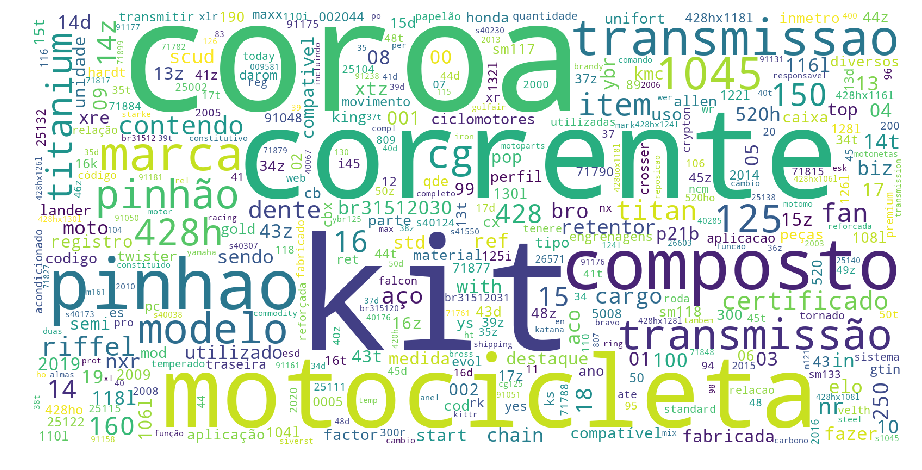

In [14]:
# Exibe a imagem da WordCloud gerada
fig, ax = plt.subplots(figsize=(20,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

In [15]:
# Exporta para um aquivo
wordcloud.to_file(r"./imagens/wordcloud_descricoes_antes.png")

### Atualiza as stopwords contendo as palavras irrelevantes
Palavras a adicionar, tais como: kit, transmissao, transmissão, coroa, pinhão, etc. que não agregam nenhuma diferença aos itens da lista

In [16]:
# Palavras a adicionar na lista de stopwords estão contidas em um arquivo csv externo
dfsw = pd.read_csv('./bases/stopwords.csv', encoding='ISO-8859-1')
stopwords_df=sorted(list(dfsw['stopword']))
swtemp = list(stopwords_df)
swtemp.sort()
print(swtemp)

['abaixo', 'acessorios', 'acessórios', 'aco', 'acondicionados', 'adaptavel', 'adaptável', 'almas', 'am', 'anel', 'ano', 'aplicacao', 'aplication', 'aplicavel', 'aplicação', 'aplicável', 'application', 'ate', 'atitanium', 'aç', 'aço', 'bravo', 'cada', 'caixa', 'caixas', 'cambio', 'certificado', 'cever', 'chain', 'chh', 'china', 'ciclomotores', 'cod', 'code', 'codigo', 'comando', 'combustão', 'comercial', 'comercialmente', 'commodity', 'compativel', 'compatível', 'compl', 'completo', 'completos', 'composto', 'composto', 'compostopor', 'compostpo', 'comum', 'condicao', 'condicoes', 'condição', 'condições', 'confeccionado', 'conhecido', 'conj', 'conjunto', 'conjuntos', 'constituido', 'constitutivo', 'constituído', 'contendo', 'coposto', 'coroa', 'corr', 'corrent', 'corrente', 'correntee', 'correntes', 'cx', 'câmbio', 'cãmbio', 'código', 'decreto', 'denominada', 'dente', 'dentes', 'descricao', 'descricão', 'descriçao', 'descrição', 'destaque', 'destaque', 'destaques', 'detransmissão', 'dime

In [17]:
# Atualizar stopwords
stopwords.update(stopwords_df)

In [18]:
# Mostra toda a lista de stopwords
swtemp = list(stopwords)
swtemp.sort()
print(swtemp)

['a', 'abaixo', 'acessorios', 'acessórios', 'aco', 'acondicionados', 'adaptavel', 'adaptável', 'almas', 'am', 'anel', 'ano', 'ao', 'aos', 'aplicacao', 'aplication', 'aplicavel', 'aplicação', 'aplicável', 'application', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'ate', 'atitanium', 'até', 'aç', 'aço', 'bravo', 'cada', 'caixa', 'caixas', 'cambio', 'certificado', 'cever', 'chain', 'chh', 'china', 'ciclomotores', 'cod', 'code', 'codigo', 'com', 'comando', 'combustão', 'comercial', 'comercialmente', 'commodity', 'como', 'compativel', 'compatível', 'compl', 'completo', 'completos', 'composto', 'compostopor', 'compostpo', 'comum', 'condicao', 'condicoes', 'condição', 'condições', 'confeccionado', 'conhecido', 'conj', 'conjunto', 'conjuntos', 'constituido', 'constitutivo', 'constituído', 'contendo', 'coposto', 'coroa', 'corr', 'corrent', 'corrente', 'correntee', 'correntes', 'cx', 'câmbio', 'cãmbio', 'código', 'da', 'das', 'de', 'decreto', 'dela', 'delas', 'dele', 'deles', 'deno

### Gera a WodCloud aplicando o filtro das stopwords atualizado

In [19]:
# Define e gera a wordcloud para um máximo de 400 palavras de tamanho mínimo 2, sem termos duplos
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, height=800,
                      max_words=400,
                      min_word_length=2,
                      collocations=False,
                      include_numbers=True).generate(descricoes)

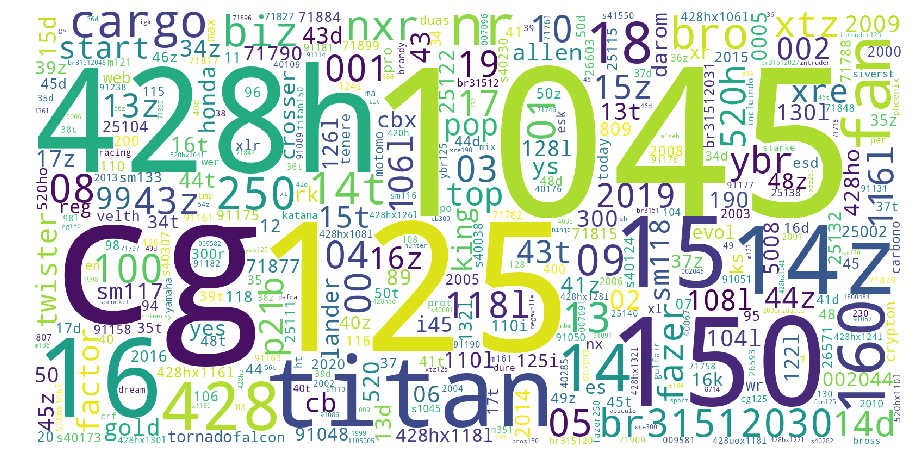

In [20]:
# Exibe a imagem da nova WordCloud gerada
fig, ax = plt.subplots(figsize=(20,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

In [21]:
# Exporta para um aquivo
wordcloud.to_file("./imagens/wordcloud_descricoes_depois.png")